#     COURSE: Linear algebra: theory and implementation
##    SECTION: Least-squares

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Least-squares via row-reduction
---


In [7]:
m = 10
n = 3

# create data
X = np.random.randn(m,n) # "design matrix"
y = np.random.randn(m,1) # "outcome measures (data)", 
                         # (m, 1) instead of (m) 
                         # -> column vector with orientation

np.shape(y)

(10, 1)

In [8]:
# try directly applying RREF
Xy = Matrix( np.concatenate([X,y],axis=1) )
print( Xy.rref() )

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [6]:
# now reapply to the normal equations
XtX = X.T@X
Xty = X.T@y
normEQ = Matrix( np.concatenate( [XtX,Xty],axis=1 ) )

Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print(np.array(Xsol)), print(' ')
print(beta), print(' ')

# compare to left-inverse
print("Left-inverse")
beta2 = np.linalg.inv(XtX) @ Xty
print(beta2), print(' ')

# and with the python solver
print('Python solver')
beta3 = np.linalg.solve(XtX, Xty)
print(beta3)

[[1 0 0 -0.263980785261924]
 [0 1 0 -0.419237999332161]
 [0 0 1 -0.0168720818854771]]
 
Matrix([[-0.263980785261924], [-0.419237999332161], [-0.0168720818854771]])
 
Left-inverse
[[-0.26398079]
 [-0.419238  ]
 [-0.01687208]]
 
Python solver
[[-0.26398079]
 [-0.419238  ]
 [-0.01687208]]



---
# VIDEO: Least-squares example 1
---


In [24]:
# step 1: model, a = beta * 1
# data -> y
data = np.array([[-4,0,-3,1,2,8,5,8]]).T  # .T for column vector
N    = len(data)

# design matrix
X = np.ones([N,1])
print(X, np.shape(X))

# fit the model
b = np.linalg.solve(X.T@X, X.T@data)

# compare against the mean
m = np.mean(data)

# print the results
print(b,m)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] (8, 1)
[[2.125]] 2.125


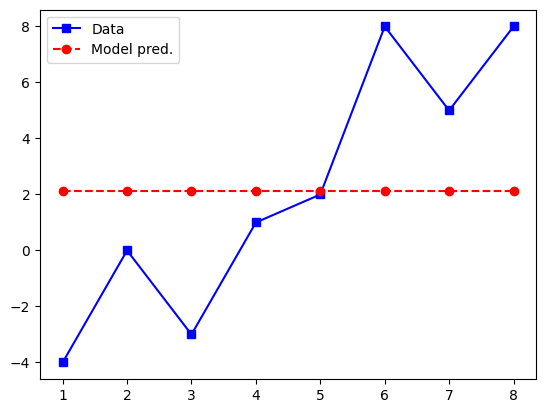

In [18]:
# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]] (8, 1)


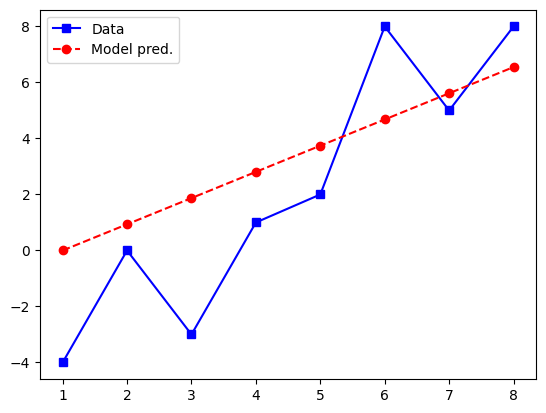

In [25]:

# new design matrix
X = np.array([np.arange(0,N)]).T
print(X, np.shape(X))

# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]] (8, 2)


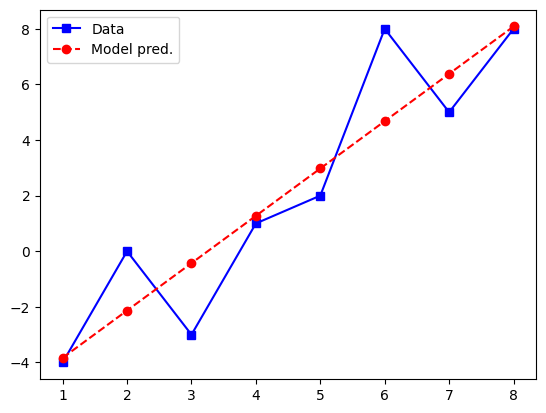

In [26]:

# design matrix, add intercept term -> the first column
X = np.concatenate( [np.ones([N,1]), np.array([np.arange(0,N)]).T],axis=1)
print(X, np.shape(X))
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1. 25.]
 [ 1. 36.]
 [ 1. 49.]] (8, 2)


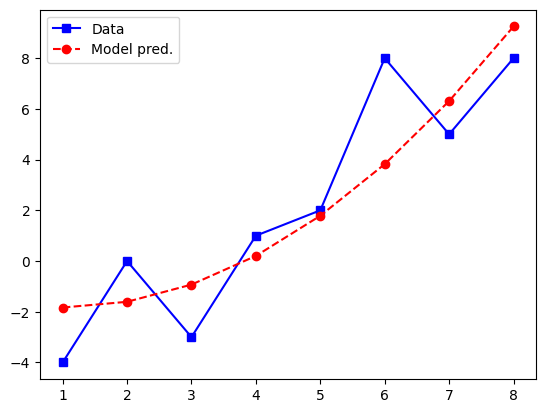

In [29]:
## now with nonlinearity (square) in the design matrix

# design matrix
X = np.concatenate( [np.ones([N,1]), np.array([np.arange(0,N)**2]).T],axis=1)
print(X, np.shape(X))
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()


---
# VIDEO: Least-squares example 2
---


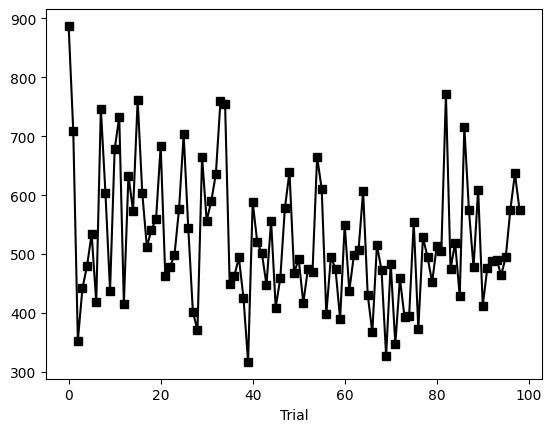

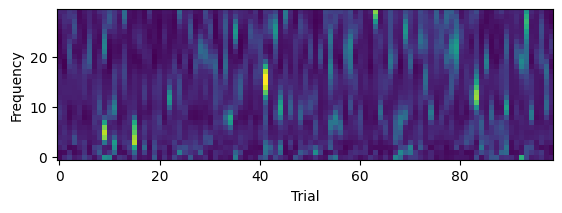

In [3]:

# load data
data = sio.loadmat('data/EEG_RT_data.mat')
rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)


# show the data
plt.plot(rts,'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata,origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

In [4]:
# create and fit the model for one frequency

# Use np.reshape to make the data column vectors!
X = np.concatenate( [np.ones([nTrials-1,1]),                   # intercept
                     np.reshape(rts[0:-1],(nTrials-1,1)),      # RTs
                     np.reshape(EEGdata[10,:-1],(nTrials-1,1)) # brain, just 10th freq
                    ],axis=1)

b1 = np.linalg.solve(X.T@X,X.T@rts[1:])
b2 = np.linalg.lstsq(X,rts[1:],rcond=None)[0]
print(b1)
print(b2)

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


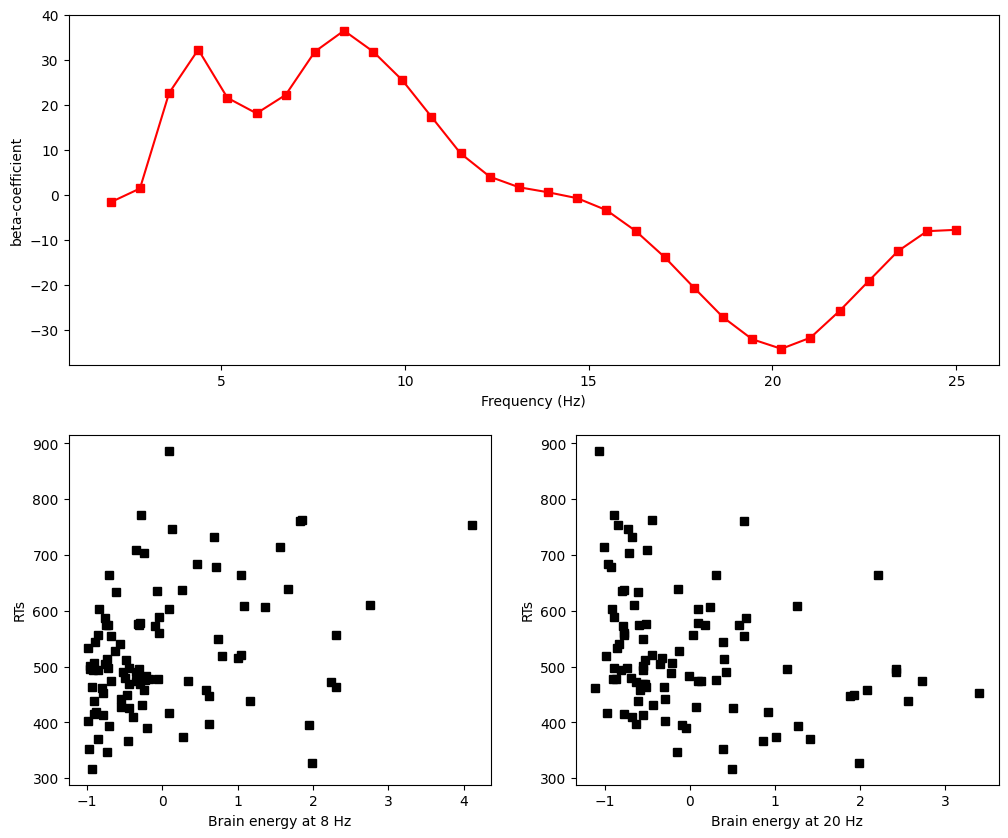

In [5]:
# initialize beta coefficients vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
    
    # design matrix
    X = np.concatenate( [np.ones([nTrials,1]),                 # intercept
                         np.reshape(EEGdata[fi,:],(nTrials,1)) # brain
                        ],axis=1)
    
    # compute parameters
    t = np.linalg.lstsq(X,rts,rcond=None)[0]
    b[fi] = t[1]  # skip t[0], it is juat an intercept


# plots
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[8])) + ' Hz')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[23])) + ' Hz')
plt.show()


In [ ]:
# Code challenge: Least-quares via QR decomposition


### Code challenge: Least-quares via QR decomposition
$$X\beta = y$$
$$X^TX\beta = X^Ty$$
$$(QR)^TQR\beta = (QR)^Ty$$
$$R^TQ^TQR\beta = (QR)^Ty$$
$$R^TIR\beta = (QR)^Ty$$
$$R^TR\beta = (QR)^Ty$$
$$(R^TR)^{-1}R^TR\beta = (R^TR)^{-1}(QR)^Ty$$
$$\beta = (R^TR)^{-1}(QR)^Ty$$

In [7]:
# generate random data
m, n = 10, 3
X = np.random.randn(m, n)
y = np.random.randn(m, 1)  # 1 for the column vector

# QR decomposition
Q, R = np.linalg.qr(X)
beta1 = np.linalg.solve(R.T@R, (Q@R).T@y)  # 6th eq.

# compare against standard left inverse method
beta2 = np.linalg.solve(X.T@X, X.T@y)  # 2nd eq.
beta3 = np.linalg.lstsq(X, y, rcond=None)[0]  # 1st eq.

print(beta1, '\n')
print(beta2, '\n')
print(beta3)

[[-0.79777756]
 [-0.14945717]
 [ 0.63878594]] 

[[-0.79777756]
 [-0.14945717]
 [ 0.63878594]] 

[[-0.79777756]
 [-0.14945717]
 [ 0.63878594]]
